<a href="https://colab.research.google.com/github/pedrodeparis/Classification-Models---Machine-Learning/blob/main/Classification_Model_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
churn = pd.read_excel("churn_data.xlsx")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.describe()

,tenure,MonthlyCharges
count,7042.000000,7042.000000
mean,32.366373,64.755886
std,24.557955,30.088238
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [4]:
churn.isna().count()

customerID          7042
tenure              7042
PhoneService        7042
Contract            7042
PaperlessBilling    7042
PaymentMethod       7042
MonthlyCharges      7042
TotalCharges        7042
Churn               7042
dtype: int64

In [5]:
churn_agg = churn.groupby("Churn")["customerID"].count().reset_index()
churn_agg

,Churn,customerID
0,No,5173
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

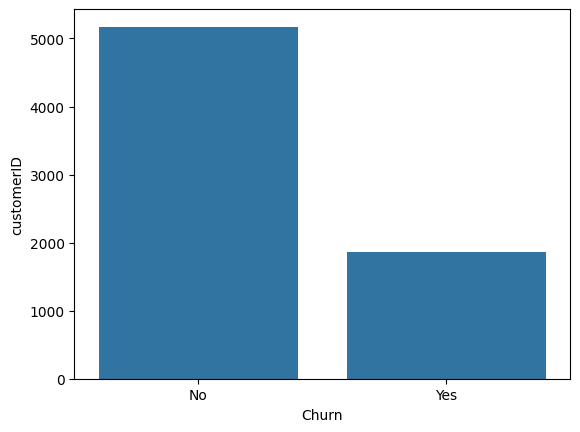

In [6]:
sns.barplot(data = churn_agg, x="Churn", y="customerID")

In [7]:
churn_payment = churn.groupby("PaymentMethod")["customerID"].count().reset_index()
churn_payment = pd.DataFrame(churn_payment)
churn_payment

,PaymentMethod,customerID
0,Bank transfer,1543
1,Credit card,1522
2,Electronic check,2365
3,Mailed check,1612


<Axes: xlabel='PaymentMethod', ylabel='customerID'>

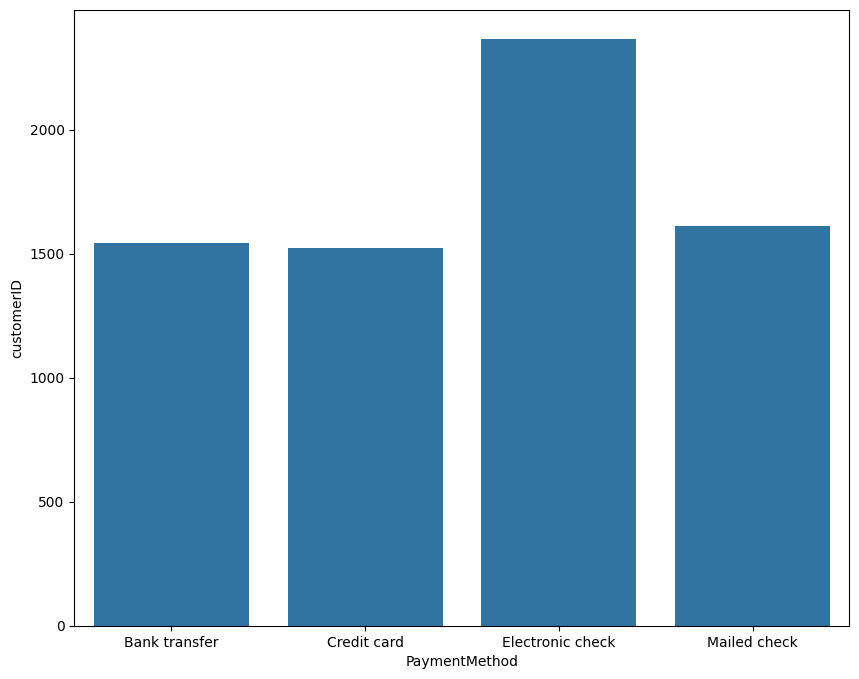

In [8]:
plt.figure(figsize=[10,8])
sns.barplot(data=churn_payment, x= "PaymentMethod", y="customerID")

In [9]:
churn.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
X = churn.drop(columns=["customerID", "Churn"], axis = 1)

y = churn[["Churn"]]

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()
le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

<ipython-input-12-7a1bd15b4c61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [13]:
X = pd.get_dummies(X)

In [14]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()

X = pd.DataFrame(mn.fit_transform(X))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
lr.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [18]:
X_test.assign(churn=y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,6535,6536,6537,6538,6539,6540,6541,6542,churn,label
5495,0.152778,0.553234,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4316,0.958333,0.720398,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
651,0.013889,0.560697,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2200,0.263889,0.397512,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1795,0.263889,0.710448,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,0.222222,0.676617,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4816,0.763889,0.564677,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2058,1.000000,0.680597,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1863,0.083333,0.068159,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [27]:
## confusion matrix do sklearn n está funcionando.

TypeError: confusion_matrix() missing 1 required positional argument: 'y_pred'

In [28]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [33]:
print(f"Acurácia(Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia(Teste): {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")

print(f"Precisão(Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precisão (Teste): {precision_score(y_test, lr.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")

print(f"f1 (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"f1 (Teste): {f1_score(y_test, lr.predict(X_test))}")

print(f"roc_auc_score (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia(Treino): 0.8837341412611248
Acurácia(Teste): 0.7921635434412265
Acurácia Balanceada(Treino): 0.8146260665793136
Acurácia Balanceada (Teste): 0.7044445060446065
Precisão(Treino): 0.8587257617728532
Precisão (Teste): 0.6481481481481481
Recall (Treino): 0.6685837526959022
Recall (Teste): 0.5125523012552301
f1 (Treino): 0.7518189167340339
f1 (Teste): 0.572429906542056
roc_auc_score (Treino): 0.93140201700613
roc_auc_score (Teste): 0.8486606313002019


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [35]:
rf.fit(X_train, y_train)

<ipython-input-35-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [36]:
rf.predict(X_test)

array([1, 0, 1, ..., 0, 0, 0])

In [37]:
X_test.assign(churn = y_test).assign(label=rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,6535,6536,6537,6538,6539,6540,6541,6542,churn,label
5495,0.152778,0.553234,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4316,0.958333,0.720398,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
651,0.013889,0.560697,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2200,0.263889,0.397512,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1795,0.263889,0.710448,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,0.222222,0.676617,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4816,0.763889,0.564677,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2058,1.000000,0.680597,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1863,0.083333,0.068159,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [38]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [39]:
print(f"Acurácia(Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia(Teste): {accuracy_score(y_test, rf.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")

print(f"Precisão(Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precisão (Teste): {precision_score(y_test, rf.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")

print(f"f1 (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"f1 (Teste): {f1_score(y_test, rf.predict(X_test))}")

print(f"roc_auc_score (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia(Treino): 0.9958341223253172
Acurácia(Teste): 0.7915956842703009
Acurácia Balanceada(Treino): 0.9939393715382951
Acurácia Balanceada (Teste): 0.6883032706424861
Precisão(Treino): 0.9942238267148015
Precisão (Teste): 0.6676737160120846
Recall (Treino): 0.9899352983465133
Recall (Teste): 0.46234309623430964
f1 (Treino): 0.9920749279538905
f1 (Teste): 0.5463535228677379
roc_auc_score (Treino): 0.9998259098612269
roc_auc_score (Teste): 0.8405826759327805


In [47]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [1,2,3,4,5,6,7,8,9,10],
             "n_estimators": [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring="accuracy", cv=5, n_jobs = -1)

In [49]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [50]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
dict = {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
rf_tunned = RandomForestClassifier(
bootstrap = True,
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 1,
max_features = 'sqrt',
max_leaf_nodes = None,
max_samples = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
n_estimators = 100,
n_jobs = None,
oob_score = False,
random_state = None,
verbose = 0,
warm_start = False)

rf_tunned

RandomForestClassifier(max_depth=1)

In [54]:
rf_tunned.fit(X_train, y_train)

<ipython-input-54-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=1)

In [55]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
X_test.assign(churn=y_test).assign(label=rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,6535,6536,6537,6538,6539,6540,6541,6542,churn,label
5495,0.152778,0.553234,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4316,0.958333,0.720398,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
651,0.013889,0.560697,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2200,0.263889,0.397512,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1795,0.263889,0.710448,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,0.222222,0.676617,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4816,0.763889,0.564677,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2058,1.000000,0.680597,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1863,0.083333,0.068159,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [57]:
print(f"Acurácia(Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia(Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Acurácia Balanceada(Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Precisão(Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precisão (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")

print(f"f1 (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"f1 (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")

print(f"roc_auc_score (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"roc_auc_score (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia(Treino): 0.7366029161143722
Acurácia(Teste): 0.7285633162975582
Acurácia Balanceada(Treino): 0.5
Acurácia Balanceada (Teste): 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precisão(Treino): 0.0
Precisão (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
f1 (Treino): 0.0
f1 (Teste): 0.0
roc_auc_score (Treino): 0.8040219072665077
roc_auc_score (Teste): 0.8093421537518304
